# **SISTEMA DE RECOMENDAÇÃO DE LIVROS**
Base de dados tirada do Kaggle: https://www.kaggle.com/datasets/zygmunt/goodbooks-10k

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns

In [141]:
livros_df = pd.read_csv('books.csv', sep=',')

In [142]:
livros_df.tail()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...
9999,10000,8914,8914,11817,31,375700455,9.780376e+12,John Keegan,1998.0,The First World War,...,9162,9700,364,117,345,2031,4138,3069,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...


In [143]:
avaliacao_df = pd.read_csv('ratings.csv', sep=',')

In [144]:
avaliacao_df.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [145]:
livros_df.shape, avaliacao_df.shape

((10000, 23), (981756, 3))

In [146]:
avaliacao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB


In [147]:
livros_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [148]:
livros_df.image_url.head(20)

0     https://images.gr-assets.com/books/1447303603m...
1     https://images.gr-assets.com/books/1474154022m...
2     https://images.gr-assets.com/books/1361039443m...
3     https://images.gr-assets.com/books/1361975680m...
4     https://images.gr-assets.com/books/1490528560m...
5     https://images.gr-assets.com/books/1360206420m...
6     https://images.gr-assets.com/books/1372847500m...
7     https://images.gr-assets.com/books/1398034300m...
8     https://images.gr-assets.com/books/1303390735m...
9     https://images.gr-assets.com/books/1320399351m...
10    https://images.gr-assets.com/books/1484565687m...
11    https://images.gr-assets.com/books/1328559506m...
12    https://images.gr-assets.com/books/1348990566m...
13    https://images.gr-assets.com/books/1424037542m...
14    https://images.gr-assets.com/books/1358276407m...
15    https://images.gr-assets.com/books/1327868566m...
16    https://images.gr-assets.com/books/1358273780m...
17    https://images.gr-assets.com/books/1499277

## Pré Processamento dos Dados

In [149]:
#Filtrando pegando somente as colunas necessárias
livros_df = livros_df[['book_id', 'authors', 'original_title', 'ratings_count', 'image_url']]

In [150]:
#Renomeando as variaveis
livros_df.rename(columns={'book_id': 'id_livro', 'authors': 'autor', 'original_title': 'titulo', 'ratings_count':'qtd_avaliacoes', 'image_url': 'url_capa'}, inplace = True)

In [151]:
#Renomeando as variaveis
avaliacao_df.rename(columns={'book_id': 'id_livro', 'user_id': 'usuario', 'rating': 'nota'}, inplace = True)

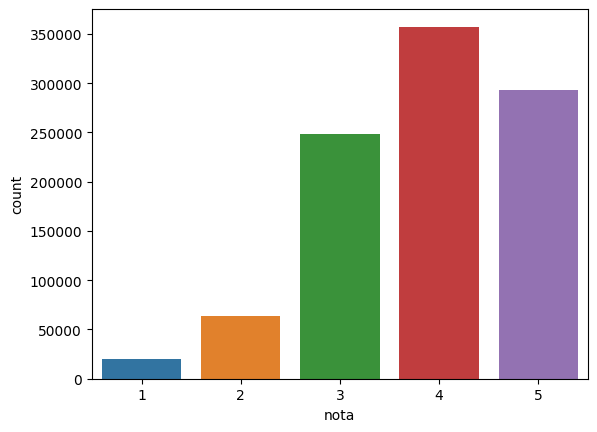

In [152]:
#Verificando as notas dadas aos livros
sns.countplot(x=avaliacao_df.nota);

In [162]:
#Vamos pegar apenas os livros que tiveram mais de 5000 avaliações
livros_df = livros_df[livros_df.qtd_avaliacoes > 5000]

In [163]:
livros_df.shape

(9983, 5)

In [165]:
livros_df.isnull().sum()

id_livro            0
autor               0
titulo            584
qtd_avaliacoes      0
url_capa            0
dtype: int64

In [166]:
#Iremos remover os valores nulos, já que não tem como substituí los
livros_df.dropna(inplace=True)

In [167]:
livros_df.isnull().sum()

id_livro          0
autor             0
titulo            0
qtd_avaliacoes    0
url_capa          0
dtype: int64

In [168]:
livros_df.shape

(9399, 5)

In [173]:
avaliacao_df.isnull().sum()

id_livro    0
usuario     0
nota        0
dtype: int64

In [169]:
#Unindo os 2 Dataframes
avaliacao_completo = avaliacao_df.merge(livros_df, on = 'id_livro', how='inner')

In [179]:
avaliacao_completo.head(10)

,id_livro,usuario,nota,autor,titulo,qtd_avaliacoes,url_capa
0,1,314,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince,1678823,https://images.gr-assets.com/books/1361039191m...
1,1,439,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince,1678823,https://images.gr-assets.com/books/1361039191m...
2,1,588,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince,1678823,https://images.gr-assets.com/books/1361039191m...
3,1,1169,4,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince,1678823,https://images.gr-assets.com/books/1361039191m...
4,1,1185,4,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince,1678823,https://images.gr-assets.com/books/1361039191m...
5,1,2077,4,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince,1678823,https://images.gr-assets.com/books/1361039191m...
6,1,2487,4,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince,1678823,https://images.gr-assets.com/books/1361039191m...
7,1,2900,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince,1678823,https://images.gr-assets.com/books/1361039191m...
8,1,3662,4,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince,1678823,https://images.gr-assets.com/books/1361039191m...
9,1,3922,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince,1678823,https://images.gr-assets.com/books/1361039191m...


In [171]:
avaliacao_completo.shape

(77920, 7)

In [172]:
#Verificando se há valores nulos
avaliacao_completo.isnull().sum()

id_livro          0
usuario           0
nota              0
autor             0
titulo            0
qtd_avaliacoes    0
url_capa          0
dtype: int64

In [177]:
# Vamos descartar os valores duplicados, para que não tenha problemas de termos o mesmo usuário avaliando o mesmo filme
# diversas vezes
avaliacao_completo.drop_duplicates(['usuario','titulo'], inplace = True)

In [178]:
avaliacao_completo.shape

(77754, 7)

In [180]:
#Removendo a variável id_livro, pois ela não será mais necessária
del avaliacao_completo['id_livro']

In [181]:
avaliacao_completo.head()

,usuario,nota,autor,titulo,qtd_avaliacoes,url_capa
0,314,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince,1678823,https://images.gr-assets.com/books/1361039191m...
1,439,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince,1678823,https://images.gr-assets.com/books/1361039191m...
2,588,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince,1678823,https://images.gr-assets.com/books/1361039191m...
3,1169,4,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince,1678823,https://images.gr-assets.com/books/1361039191m...
4,1185,4,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince,1678823,https://images.gr-assets.com/books/1361039191m...


## Criando o Modelo: Distancia de Cossenos

A distância de cosseno é uma medida de quão semelhantes são dois vetores. Ela é frequentemente usada em sistemas de recomendação para calcular a similaridade entre dois usuários ou itens. O cosseno do ângulo entre dois vetores é usado para calcular a distância de cosseno. O valor do cosseno e o ângulo aumentam com a proximidade dos vetores.


Precisamos lidar com os dados para que cada linha seja gravada e as colunas contenham as informações de cada usuário. Para fazer isso, precisamos fazer um Pivot no dataframe. Vamos usar o scikit-learn para fazer esse calculo para nós, depois de obter os vetores corretos, ou seja, um vetor para cada livro.


In [182]:
livro_usuario = avaliacao_completo.pivot_table(index='titulo', columns='usuario', values='nota').fillna(0)

In [183]:
livro_usuario.head()

usuario,2,3,4,7,9,10,11,14,15,20,...,53404,53406,53408,53409,53416,53419,53420,53422,53423,53424
titulo,,,,,,,,,,,,,,,,,,,,,
,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Animal Farm & 1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Carter Beats the Devil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Fellowship of the Ring,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [184]:
#Como temos uma matriz, preenchida com muitos zeros, devido a falta de avaliação de alguns usuarios
#então iremos a transformar em uma matriz esparsa
from scipy.sparse import csr_matrix

In [185]:
esparse_livro_usuario = csr_matrix(livro_usuario.values)

In [186]:
from sklearn.neighbors import NearestNeighbors

In [187]:
#Criação do modelo
modelo = NearestNeighbors(metric = 'cosine', algorithm='brute')

In [188]:
#Treinamento
modelo.fit(esparse_livro_usuario)

NearestNeighbors(algorithm='brute', metric='cosine')

## Testando alguns livros

In [208]:
livro_usuario.loc[livro_usuario.index.str.contains('Harry Potter'), ].index

Index(['Harry Potter Collection (Harry Potter, #1-6)',
       'Harry Potter and the Goblet of Fire',
       'Harry Potter and the Half-Blood Prince',
       'Harry Potter and the Order of the Phoenix',
       'Harry Potter and the Philosopher's Stone',
       'Harry Potter and the Prisoner of Azkaban'],
      dtype='object', name='titulo')

In [209]:
livro = 'Harry Potter and the Order of the Phoenix'

posicao_livro = livro_usuario.index.get_loc(livro)

posicao_livro

239

In [210]:
quantidade_recomendacoes = 15

distancias, indices = modelo.kneighbors(livro_usuario.filter(items = ['Harry Potter and the Order of the Phoenix'], axis=0).values.reshape(1, -1), n_neighbors = quantidade_recomendacoes+1)

for i in range(0, len(distancias.flatten())):
    if i == 0:
        print('Recomendações para {0}:\n'.format(livro_usuario.index[posicao_livro]))
    else:
        print('{0}: {1}, com a distância de: {2}:'.format(i, livro_usuario.index[indices.flatten()[i]], distancias.flatten()[i]))

Recomendações para Harry Potter and the Order of the Phoenix:

1: The Lord of the Rings, com a distância de: 0.40241308954159594:
2: The Ultimate Hitchhiker's Guide: Five Complete Novels and One Story, com a distância de: 0.4097614772716248:
3: Harry Potter and the Prisoner of Azkaban, com a distância de: 0.41205601974725015:
4: Notes from a Small Island, com a distância de: 0.4159568738240007:
5: Harry Potter and the Half-Blood Prince, com a distância de: 0.4444738573252147:
6: Down Under, com a distância de: 0.44452856661417617:
7: Harry Potter Collection (Harry Potter, #1-6), com a distância de: 0.4538274129514055:
8: Neither Here Nor There: Travels in Europe, com a distância de: 0.4760079559313145:
9: Harry Potter and the Philosopher's Stone, com a distância de: 0.47978396766329523:
10: A Short History of Nearly Everything, com a distância de: 0.4902663208935032:
11: Notes from a Big Country, com a distância de: 0.4916473653314325:
12: The Hitchhiker's Guide to the Galaxy, com a di

## Recomendações com a capa

In [211]:
from IPython.display import HTML

for i in range(0, len(distancias.flatten())):
    if i == 0:
        print('Recomendações para {0}:\n'.format(livro_usuario.index[posicao_livro]))
    else:
        # Pegando o título da recomendação
        titulo_recomendacao = livro_usuario.index[indices.flatten()[i]]

        # Buscando a url da capa a partir do título (não temos mais o isbn, lembra?)
        titulo, url_capa = livros_df.loc[livros_df['titulo'] == titulo_recomendacao, ['titulo', 'url_capa']].values[0]

        # Imprimindo o título e usando a função HTML para mostrar a imagem a partir
        # da URL
        print(f'Recomendação {i}: {titulo}')
        display(HTML(f'<img src="{url_capa}">'))

Recomendações para Harry Potter and the Order of the Phoenix:

Recomendação 1: The Lord of the Rings


Recomendação 2: The Ultimate Hitchhiker's Guide: Five Complete Novels and One Story


Recomendação 3: Harry Potter and the Prisoner of Azkaban


Recomendação 4: Notes from a Small Island


Recomendação 5: Harry Potter and the Half-Blood Prince


Recomendação 6: Down Under


Recomendação 7: Harry Potter Collection (Harry Potter, #1-6)


Recomendação 8: Neither Here Nor There: Travels in Europe


Recomendação 9: Harry Potter and the Philosopher's Stone


Recomendação 10: A Short History of Nearly Everything


Recomendação 11: Notes from a Big Country


Recomendação 12: The Hitchhiker's Guide to the Galaxy


Recomendação 13: Heidi


Recomendação 14: The Mother Tongue: English and How It Got That Way


Recomendação 15: The Lord of the Rings: Weapons and Warfare
